In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D

random.seed(520)

### Generate trajectories for 2 objects

In [20]:
# The first Object
data_points_1 = []

for t in range(1, 16):
    x = random.uniform(-5, 5)
    y = random.uniform(-5, 5)

    data_points_1.append((x, y, t))

for point in data_points_1:
    print(point)

(-3.3365056399920934, 4.911714748838845, 1)
(1.1620634263624252, -2.1870388495809934, 2)
(4.435126927557761, 3.537259193751437, 3)
(-3.662092197156559, -1.302821907135674, 4)
(4.7302413868862185, -0.23908340471287293, 5)
(2.051542091259291, 1.414862233942138, 6)
(3.9863427378709133, -0.9266295080922751, 7)
(-4.798020548594919, -0.9326851879934548, 8)
(0.16068524233675063, -2.069963227661523, 9)
(-2.864207528360474, -1.3344834449658647, 10)
(-0.8574935775308079, 3.6942155985775837, 11)
(-3.3543283217823627, 0.44539791779353344, 12)
(1.9713891888849844, -2.999430977054982, 13)
(0.34544833446321555, -3.1490821792160926, 14)
(2.5224456796158226, 2.27970462186833, 15)


In [21]:
# The first Object
data_points_2 = []

for t in range(1, 16):
    x = random.uniform(-5, 5)
    y = random.uniform(-5, 5)

    data_points_2.append((x, y, t))

for point in data_points_2:
    print(point)

(-1.7487287912926162, -4.357096918268891, 1)
(0.749624846679108, 0.7455673609327098, 2)
(3.23565860715153, 1.7824676494372884, 3)
(3.4900129117381855, 0.17306819972721676, 4)
(-0.785667268984497, -2.570806146621628, 5)
(3.550709867023917, 2.827732097771664, 6)
(1.8273099064601492, -1.079878420782033, 7)
(-2.293398151683518, -3.4448335873932576, 8)
(-3.9035296503321892, -2.2873081314211676, 9)
(-2.158133159864688, -1.3637089181246709, 10)
(1.2937135674059919, -4.156946480941045, 11)
(1.1793496004763515, -1.344695440918544, 12)
(-0.25699923768795685, -3.330389156510404, 13)
(4.900420786375241, -0.13269741005411184, 14)
(0.48227244350634635, 2.922447790233865, 15)


In [2]:
data_points_1 = [(-3.3365056399920934, 4.911714748838845, 1),
(1.1620634263624252, -2.1870388495809934, 2),
(4.435126927557761, 3.537259193751437, 3),
(-3.662092197156559, -1.302821907135674, 4),
(4.7302413868862185, -0.23908340471287293, 5),
(2.051542091259291, 1.414862233942138, 6),
(3.9863427378709133, -0.9266295080922751, 7),
(-4.798020548594919, -0.9326851879934548, 8),
(0.16068524233675063, -2.069963227661523, 9),
(-2.864207528360474, -1.3344834449658647, 10),
(-0.8574935775308079, 3.6942155985775837, 11),
(-3.3543283217823627, 0.44539791779353344, 12),
(1.9713891888849844, -2.999430977054982, 13),
(0.34544833446321555, -3.1490821792160926, 14),
(2.5224456796158226, 2.27970462186833, 15)]

data_points_2 = [(-1.7487287912926162, -4.357096918268891, 1),
(0.749624846679108, 0.7455673609327098, 2),
(3.23565860715153, 1.7824676494372884, 3),
(3.4900129117381855, 0.17306819972721676, 4),
(-0.785667268984497, -2.570806146621628, 5),
(3.550709867023917, 2.827732097771664, 6),
(1.8273099064601492, -1.079878420782033, 7),
(-2.293398151683518, -3.4448335873932576, 8),
(-3.9035296503321892, -2.2873081314211676, 9),
(-2.158133159864688, -1.3637089181246709, 10),
(1.2937135674059919, -4.156946480941045, 11),
(1.1793496004763515, -1.344695440918544, 12),
(-0.25699923768795685, -3.330389156510404, 13),
(4.900420786375241, -0.13269741005411184, 14),
(0.48227244350634635, 2.922447790233865, 15)]

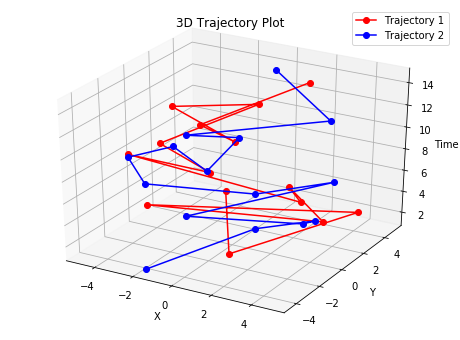

In [3]:
# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x1 = [point[0] for point in data_points_1]
y1 = [point[1] for point in data_points_1]
z1 = [point[2] for point in data_points_1]

x2 = [point[0] for point in data_points_2]
y2 = [point[1] for point in data_points_2]
z2 = [point[2] for point in data_points_2]

ax.plot(x1, y1, z1, c='r', marker='o', label='Trajectory 1')
ax.plot(x2, y2, z2, c='b', marker='o', label='Trajectory 2')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')
ax.set_title('3D Trajectory Plot')
ax.legend()

plt.show()

### Gaussian process regression

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.preprocessing import StandardScaler

### Data Point 1

#### X verse time using original data

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


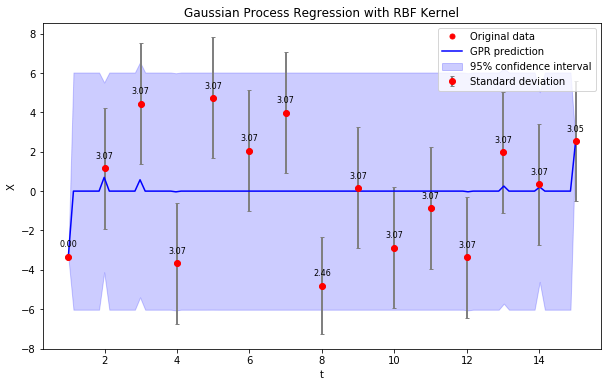

In [5]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t, X)

# Predict at new points
t_new = np.linspace(1, 15, 100).reshape(-1, 1)
X_pred, sigma = gp.predict(t_new, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


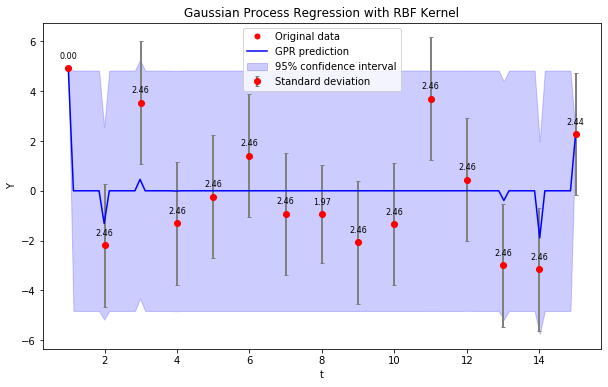

In [6]:
Y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t, Y)

# Predict at new points
t_new = np.linspace(1, 15, 100).reshape(-1, 1)
Y_pred, sigma = gp.predict(t_new, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, Y, 'r.', markersize=10, label='Original data')
plt.plot(t_new, Y_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), Y_pred.ravel() - 1.96 * sigma, Y_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, Y, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], Y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()

#### X verse time using standardized data

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


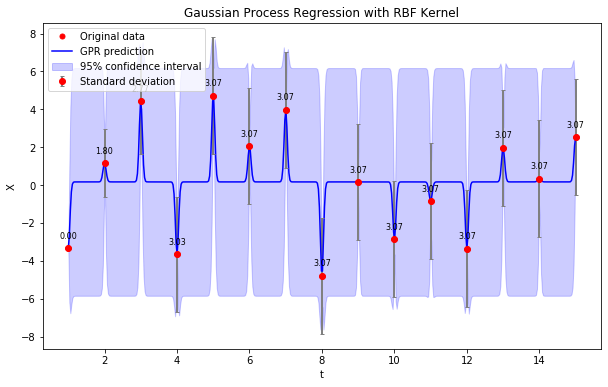

In [7]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_X = StandardScaler()
scaler_t = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, X_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
X_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
X_pred = scaler_X.inverse_transform(X_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_X.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


#### Y verse time using standardized data

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


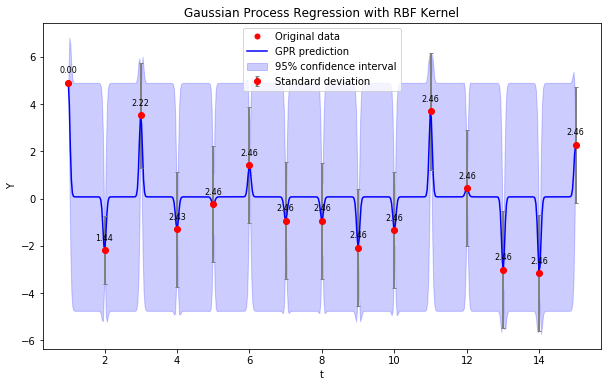

In [8]:
Y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_Y = StandardScaler()
scaler_t = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, Y_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
Y_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_Y.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, Y, 'r.', markersize=10, label='Original data')
plt.plot(t_new, Y_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), Y_pred.ravel() - 1.96 * sigma, Y_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, Y, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], Y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


#### Tuning hyperparameters for kernel to make the data fit better

##### C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1)) -- X vs time

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:432: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


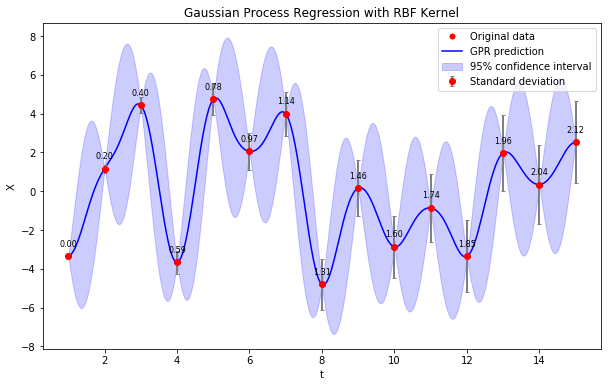

In [9]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_X = StandardScaler()
scaler_t = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha = 0, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, X_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
X_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
X_pred = scaler_X.inverse_transform(X_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_X.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


##### No obvious difference while changing hyperparameters in Constant Kernel and length_scale in RBF

#### C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1)) -- Y vs time

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:432: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


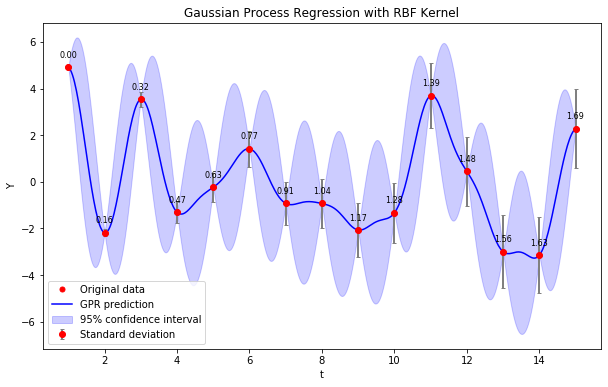

In [10]:
Y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_Y = StandardScaler()
scaler_t = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha = 0, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, Y_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
Y_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_Y.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, Y, 'r.', markersize=10, label='Original data')
plt.plot(t_new, Y_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), Y_pred.ravel() - 1.96 * sigma, Y_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, Y, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], Y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


#### Slightly difference with C(1.0, (1e-3, 1e3)) * Matern(1.0, (1e-1, 1e1))

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


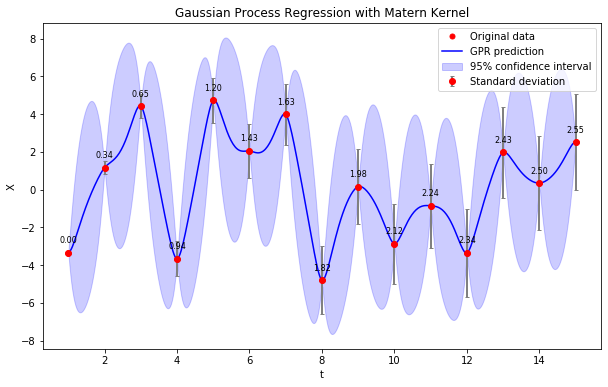

In [11]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_X = StandardScaler()
scaler_t = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (1e-1, 1e1))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, X_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
X_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
X_pred = scaler_X.inverse_transform(X_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_X.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with Matern Kernel')
plt.legend()
plt.show()


/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


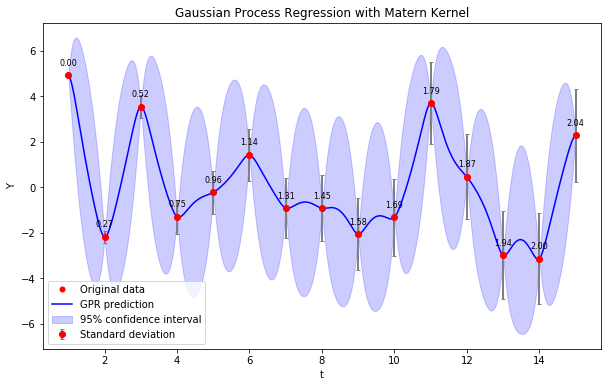

In [12]:
Y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_Y = StandardScaler()
scaler_t = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (1e-1, 1e1))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, Y_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
Y_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_Y.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, Y, 'r.', markersize=10, label='Original data')
plt.plot(t_new, Y_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), Y_pred.ravel() - 1.96 * sigma, Y_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, Y, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], Y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with Matern Kernel')
plt.legend()
plt.show()


#### C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5))

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


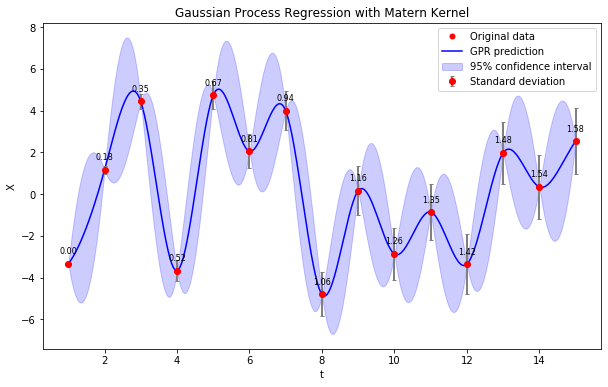

In [13]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_X = StandardScaler()
scaler_t = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, X_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
X_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
X_pred = scaler_X.inverse_transform(X_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_X.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with Matern Kernel')
plt.legend()
plt.show()


/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


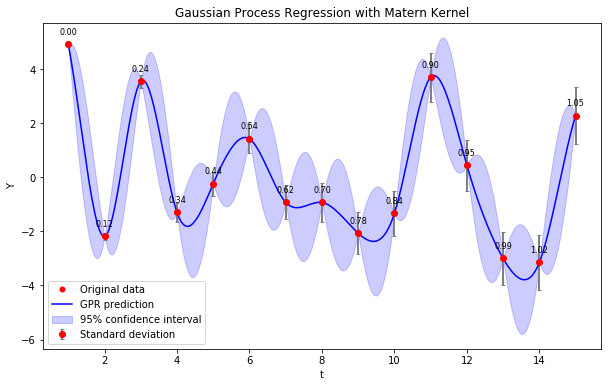

In [14]:
Y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# Normalize the data
scaler_Y = StandardScaler()
scaler_t = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)
t_scaled = scaler_t.fit_transform(t)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t_scaled, Y_scaled)

# Predict at new points
t_new = np.linspace(1, 15, 500).reshape(-1, 1)
t_new_scaled = scaler_t.transform(t_new)
Y_pred_scaled, sigma_scaled = gp.predict(t_new_scaled, return_std=True)

# Convert predictions back to original scale
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
sigma = sigma_scaled * scaler_Y.scale_

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, Y, 'r.', markersize=10, label='Original data')
plt.plot(t_new, Y_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), Y_pred.ravel() - 1.96 * sigma, Y_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, Y, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], Y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('Y')
plt.title('Gaussian Process Regression with Matern Kernel')
plt.legend()
plt.show()


/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


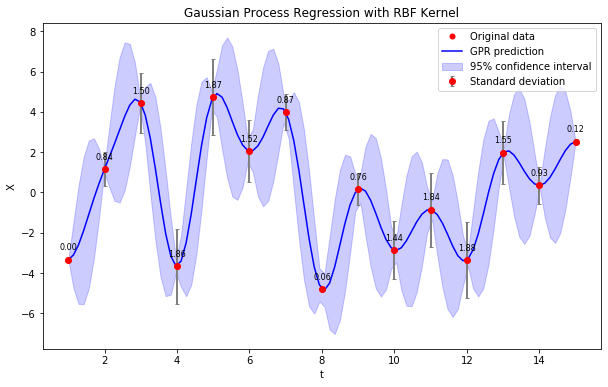

In [15]:
X = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

# kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 5))

# Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(t, X)

# Predict at new points
t_new = np.linspace(1, 15, 100).reshape(-1, 1)
X_pred, sigma = gp.predict(t_new, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, X, 'r.', markersize=10, label='Original data')
plt.plot(t_new, X_pred, 'b-', label='GPR prediction')
plt.fill_between(t_new.ravel(), X_pred.ravel() - 1.96 * sigma, X_pred.ravel() + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.errorbar(t, X, yerr=sigma[:len(t)], fmt='o', color='red', ecolor='gray', elinewidth=2, capsize=2, label='Standard deviation')

for i in range(len(t)):
    plt.annotate(f'{sigma[i]:.2f}', (t[i], X[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.xlabel('t')
plt.ylabel('X')
plt.title('Gaussian Process Regression with RBF Kernel')
plt.legend()
plt.show()


### Summary:
- C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) performs badly when split x and y seperately
- C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1)) performs better
- C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 5)) has smaller standard deviation
- C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5)) performs best

#### GPR with X and Y simultaneously

#### C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


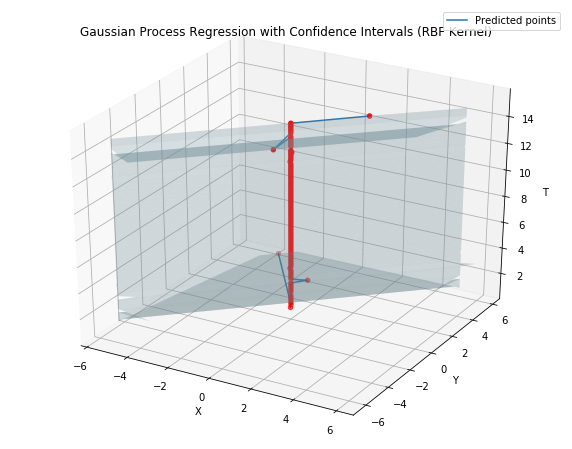

In [16]:
X = np.array([(point[0], point[1]) for point in data_points_1])
y = np.array([point[2] for point in data_points_1])

kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(y.reshape(-1, 1), X)

# Predict at new points
t_new = np.linspace(1, 15, 100)
X_pred, sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

# Extract x and y from X_pred
x_pred = X_pred[:, 0]
y_pred = X_pred[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_pred[:, 0], X_pred[:, 1], t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')


# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * sigma[:, 0]
x_pred_lower = x_pred - 1.96 * sigma[:, 0]
y_pred_upper = y_pred + 1.96 * sigma[:, 1]
y_pred_lower = y_pred - 1.96 * sigma[:, 1]

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression with Confidence Intervals (RBF Kernel)')
ax.legend()

plt.show()

#### C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1))


/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


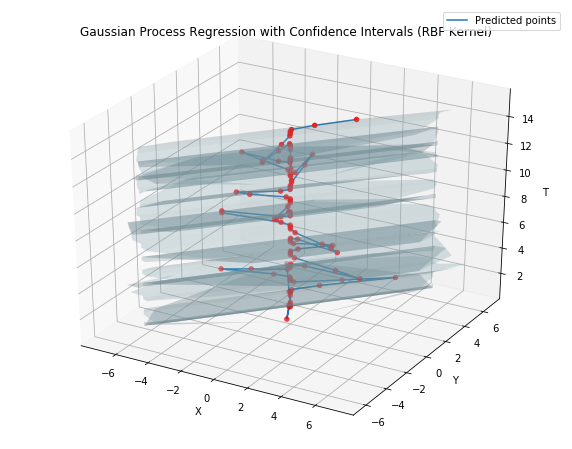

In [17]:
X = np.array([(point[0], point[1]) for point in data_points_1])
y = np.array([point[2] for point in data_points_1])

kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-1, 1e1))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(y.reshape(-1, 1), X)

# Predict at new points
t_new = np.linspace(1, 15, 100)
X_pred, sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

# Extract x and y from X_pred
x_pred = X_pred[:, 0]
y_pred = X_pred[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_pred[:, 0], X_pred[:, 1], t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')


# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * sigma[:, 0]
x_pred_lower = x_pred - 1.96 * sigma[:, 0]
y_pred_upper = y_pred + 1.96 * sigma[:, 1]
y_pred_lower = y_pred - 1.96 * sigma[:, 1]

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression with Confidence Intervals (RBF Kernel)')
ax.legend()

plt.show()

#### C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 0.5))

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


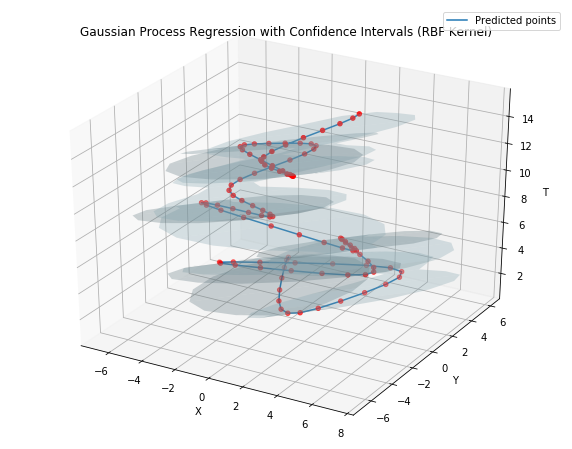

In [18]:
X = np.array([(point[0], point[1]) for point in data_points_1])
y = np.array([point[2] for point in data_points_1])

kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 0.5))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(y.reshape(-1, 1), X)

# Predict at new points
t_new = np.linspace(1, 15, 100)
X_pred, sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

# Extract x and y from X_pred
x_pred = X_pred[:, 0]
y_pred = X_pred[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_pred[:, 0], X_pred[:, 1], t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')


# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * sigma[:, 0]
x_pred_lower = x_pred - 1.96 * sigma[:, 0]
y_pred_upper = y_pred + 1.96 * sigma[:, 1]
y_pred_lower = y_pred - 1.96 * sigma[:, 1]

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression with Confidence Intervals (RBF Kernel)')
ax.legend()

plt.show()

#### C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5))

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


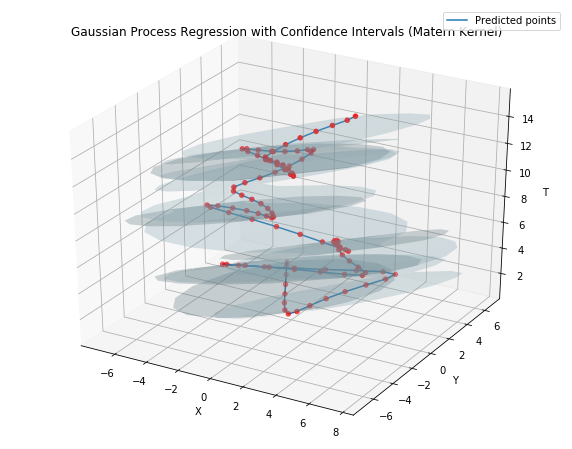

In [19]:
X = np.array([(point[0], point[1]) for point in data_points_1])
y = np.array([point[2] for point in data_points_1])

kernel = C(1.0, (1e-3, 1e3)) * Matern(1.0, (0.5, 5))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(y.reshape(-1, 1), X)

# Predict at new points
t_new = np.linspace(1, 15, 100)
X_pred, sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

# Extract x and y from X_pred
x_pred = X_pred[:, 0]
y_pred = X_pred[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_pred[:, 0], X_pred[:, 1], t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')


# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * sigma[:, 0]
x_pred_lower = x_pred - 1.96 * sigma[:, 0]
y_pred_upper = y_pred + 1.96 * sigma[:, 1]
y_pred_lower = y_pred - 1.96 * sigma[:, 1]

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression with Confidence Intervals (Matern Kernel)')
ax.legend()

plt.show()

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


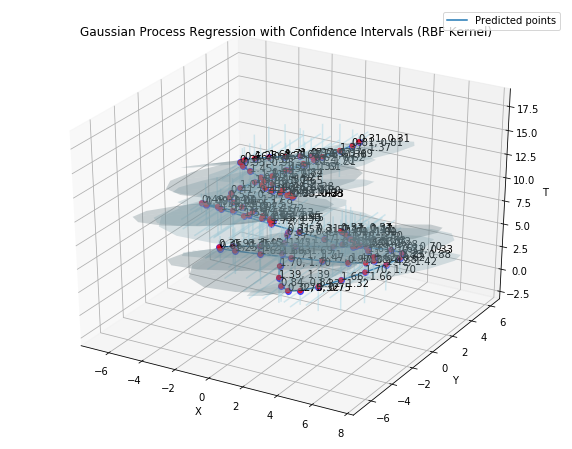

In [20]:
X = np.array([(point[0], point[1]) for point in data_points_1])
y = np.array([point[2] for point in data_points_1])

kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 5))

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(y.reshape(-1, 1), X)

# Predict at new points
t_new = np.linspace(1, 15, 100)
X_pred, sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

# Extract x and y from X_pred
x_pred = X_pred[:, 0]
y_pred = X_pred[:, 1]

# Separate sigma into its components
sigma_x = sigma[:, 0]
sigma_y = sigma[:, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(X_pred[:, 0], X_pred[:, 1], t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')

# Error bars for standard deviation in x and y
for i in range(len(t_new)):
    ax.plot([x_pred[i], x_pred[i]], [y_pred[i], y_pred[i]], [t_new[i] - 1.96 * sigma_x[i], t_new[i] + 1.96 * sigma_x[i]], color='lightblue', alpha=0.5)
    ax.plot([x_pred[i], x_pred[i]], [y_pred[i] - 1.96 * sigma_y[i], y_pred[i] + 1.96 * sigma_y[i]], [t_new[i], t_new[i]], color='lightblue', alpha=0.5)
    ax.plot([x_pred[i]], [y_pred[i]], [t_new[i]], 'o', color='blue', alpha=0.6)

# Annotate the standard deviations
for i in range(len(t_new)):
    ax.text(x_pred[i], y_pred[i], t_new[i], f'{sigma_x[i]:.2f}, {sigma_y[i]:.2f}', color='black')


# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * sigma[:, 0]
x_pred_lower = x_pred - 1.96 * sigma[:, 0]
y_pred_upper = y_pred + 1.96 * sigma[:, 1]
y_pred_lower = y_pred - 1.96 * sigma[:, 1]

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression with Confidence Intervals (RBF Kernel)')
ax.legend()

plt.show()

##### Use kernel C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 5)) to compare [(x,y) vs t] and [x vs t + y vs t] to see if they are the same

/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/chenxintong/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


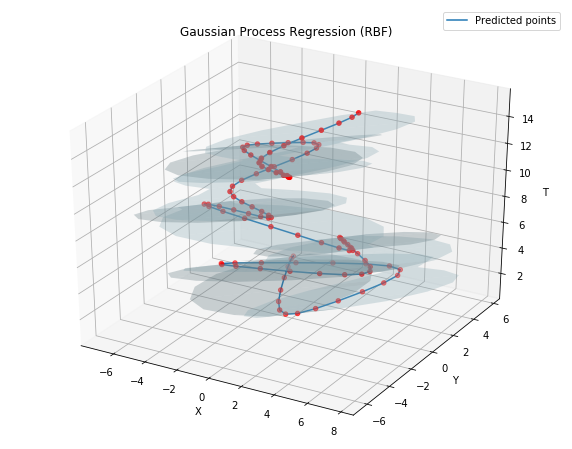

In [21]:
x = np.array([point[0] for point in data_points_1]).reshape(-1, 1)
y = np.array([point[1] for point in data_points_1]).reshape(-1, 1)
t = np.array([point[2] for point in data_points_1]).reshape(-1, 1)

kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (0.5, 5))

# Generate new points
t_new = np.linspace(1, 15, 100)

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(t, x)

x_pred, x_sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(t, y)

y_pred, y_sigma = gpr.predict(t_new.reshape(-1, 1), return_std=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_pred, y_pred, t_new, c='r', marker='o')

# Line plot of the predicted points
ax.plot(x_pred, y_pred, t_new, label='Predicted points')

# Confidence interval (plot as a surface for visualization)
x_pred_upper = x_pred + 1.96 * x_sigma
x_pred_lower = x_pred - 1.96 * x_sigma
y_pred_upper = y_pred + 1.96 * y_sigma
y_pred_lower = y_pred - 1.96 * y_sigma

# Surface plot for confidence intervals
ax.plot_surface(np.vstack((x_pred_upper, x_pred_lower)),
                np.vstack((y_pred_upper, y_pred_lower)),
                np.vstack((t_new, t_new)), color='lightblue', alpha=0.3)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_title('Gaussian Process Regression (RBF)')
ax.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fftn, fftshift

# Generate synthetic dataset of points (x, y, t)
# Replace this with your actual dataset loading if needed
num_points = 100
t = np.linspace(0, 10, num_points)
x = np.sin(t) + 0.5 * np.random.randn(num_points)
y = np.cos(t) + 0.5 * np.random.randn(num_points)

# Combine into a dataset
data = np.vstack((x, y, t)).T

# Visualize the dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
plt.show()


In [ ]:
# Apply 3D Fourier transform
# Create a grid in the (x, y, t) space
grid_size = 64  # Define the size of the grid
x_grid = np.linspace(np.min(x), np.max(x), grid_size)
y_grid = np.linspace(np.min(y), np.max(y), grid_size)
t_grid = np.linspace(np.min(t), np.max(t), grid_size)
x_mesh, y_mesh, t_mesh = np.meshgrid(x_grid, y_grid, t_grid, indexing='ij')

# Interpolate the data to fit into the grid
from scipy.interpolate import griddata

points = np.vstack((data[:, 0], data[:, 1], data[:, 2])).T
values = np.ones(len(data))  # We can use ones since we're just interested in the presence of points

grid_values = griddata(points, values, (x_mesh, y_mesh, t_mesh), method='linear', fill_value=0)

# Apply the Fourier transform
F_u_v_w = fftn(grid_values)
F_u_v_w_shifted = fftshift(F_u_v_w)  # Shift the zero frequency component to the center

# Frequency domain
u_freq = np.fft.fftfreq(grid_size, d=(x_grid[1] - x_grid[0]))
v_freq = np.fft.fftfreq(grid_size, d=(y_grid[1] - y_grid[0]))
w_freq = np.fft.fftfreq(grid_size, d=(t_grid[1] - t_grid[0]))
u_mesh, v_mesh, w_mesh = np.meshgrid(fftshift(u_freq), fftshift(v_freq), fftshift(w_freq), indexing='ij')


In [ ]:
# Visualize the magnitude of the Fourier transform
magnitude = np.abs(F_u_v_w_shifted)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use a threshold to visualize significant frequencies
threshold = np.max(magnitude) * 0.1
indices = magnitude > threshold

ax.scatter(u_mesh[indices], v_mesh[indices], w_mesh[indices], c=magnitude[indices], cmap='viridis')
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_zlabel('W')
plt.show()
